In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor


access = pd.read_excel("DataDownload.xls",sheet_name="ACCESS")
stores = pd.read_excel("DataDownload.xls",sheet_name="STORES")
restaurants = pd.read_excel("DataDownload.xls",sheet_name="RESTAURANTS")
assistance = pd.read_excel("DataDownload.xls",sheet_name="ASSISTANCE")
insecurity = pd.read_excel("DataDownload.xls",sheet_name="INSECURITY")
pricetax = pd.read_excel("DataDownload.xls",sheet_name="PRICES_TAXES")
local = pd.read_excel("DataDownload.xls",sheet_name="LOCAL")
health = pd.read_excel("DataDownload.xls",sheet_name="HEALTH")
ses = pd.read_excel("DataDownload.xls", sheet_name="SOCIOECONOMIC")


print(access.shape)
print(stores.shape)
print(restaurants.shape)
print(assistance.shape)
print(insecurity.shape)
print(pricetax.shape)
print(local.shape)
print(health.shape)



(3143, 44)
(3143, 39)
(3143, 19)
(3143, 48)
(3143, 11)
(3143, 11)
(3143, 100)
(3143, 14)


In [2]:
health.loc[:,"pct_obese_change"] = (health[["PCT_OBESE_ADULTS13"]].values - 
                           health[["PCT_OBESE_ADULTS08"]].values)
health.loc[:,"pct_diabetes_change"] = (health[["PCT_DIABETES_ADULTS13"]].values - 
                              health[["PCT_DIABETES_ADULTS08"]].values)

In [3]:
health1 = health.loc[:,["FIPS","State","County","PCT_DIABETES_ADULTS13","PCT_OBESE_ADULTS13",
                 "pct_obese_change","pct_diabetes_change","RECFACPTH09",
                 "RECFACPTH14","PCH_RECFACPTH_09_14"]]


health1_NA = health1.isnull().sum()
print(health1_NA[health1_NA!=0])
health1.loc[:,'PCT_DIABETES_ADULTS13']=health1.groupby('State')['PCT_DIABETES_ADULTS13'].transform(
        lambda x: x.fillna(x.median()))
health1.loc[:,'PCT_OBESE_ADULTS13']=health1.groupby('State')['PCT_OBESE_ADULTS13'].transform(
        lambda x: x.fillna(x.median()))
health1.loc[:,'pct_obese_change']=health1.groupby('State')['pct_obese_change'].transform(
        lambda x: x.fillna(x.median()))
health1.loc[:,'pct_diabetes_change']=health1.groupby('State')['pct_diabetes_change'].transform(
        lambda x: x.fillna(x.median()))
health1.loc[:,'PCH_RECFACPTH_09_14']=health1.groupby('State')['PCH_RECFACPTH_09_14'].transform(
        lambda x: x.fillna(x.median()))

health1_NA = health1.isnull().sum()
print(health1_NA[health1_NA!=0])

PCT_DIABETES_ADULTS13      1
PCT_OBESE_ADULTS13         1
pct_obese_change           6
pct_diabetes_change        6
PCH_RECFACPTH_09_14      123
dtype: int64
Series([], dtype: int64)


In [4]:
pctx = pricetax.loc[:,["FIPS","State","MILK_PRICE10","SODA_PRICE10","MILK_SODA_PRICE10",
                      "SODATAX_STORES14","SODATAX_VENDM14","CHIPSTAX_STORES14",
                      "CHIPSTAX_VENDM14","FOOD_TAX14"]]

pctx_NA = pctx.isnull().sum()
print(pctx_NA[pctx_NA!=0])
pctx.loc[:,'MILK_PRICE10']=pctx.MILK_PRICE10.transform(
        lambda x: x.fillna(x.median()))
pctx.loc[:,'SODA_PRICE10']=pctx.SODA_PRICE10.transform(
        lambda x: x.fillna(x.median()))
pctx.loc[:,'MILK_SODA_PRICE10']=pctx.MILK_SODA_PRICE10.transform(
        lambda x: x.fillna(x.median()))
pctx_NA = pctx.isnull().sum()
print(pctx_NA[pctx_NA!=0])

MILK_PRICE10         34
SODA_PRICE10         34
MILK_SODA_PRICE10    34
dtype: int64
Series([], dtype: int64)


In [5]:
acs = access.loc[:,["FIPS","State","PCT_LACCESS_POP10","PCT_LACCESS_LOWI10",
                    "PCT_LACCESS_HHNV10",
                    "PCT_LACCESS_CHILD10", "PCT_LACCESS_SENIORS10"]]
acs_NA = acs.isnull().sum()
print(acs_NA[acs_NA!=0])


Series([], dtype: int64)


In [6]:
st = stores.loc[:,["FIPS","State","GROCPTH09","GROCPTH14",
                    "PCH_GROCPTH_09_14","SUPERCPTH09",
                    "SUPERCPTH14", "PCH_SUPERCPTH_09_14","CONVSPTH09",
                    "CONVSPTH14","PCH_CONVSPTH_09_14","SPECSPTH09",
                    "SPECSPTH14","PCH_SPECSPTH_09_14","SNAPSPTH12",
                    "WICSPTH08","WICSPTH12","PCH_WICSPTH_08_12"]]
st_NA = st.isnull().sum()
print(st_NA[st_NA!=0])
st.loc[:,'PCH_GROCPTH_09_14']=st.groupby('State')['PCH_GROCPTH_09_14'].transform(
        lambda x: x.fillna(x.median()))
st.loc[:,'PCH_SUPERCPTH_09_14']=st.groupby('State')['PCH_SUPERCPTH_09_14'].transform(
        lambda x: x.fillna(x.median()))
st.loc[:,'PCH_CONVSPTH_09_14']=st.groupby('State')['PCH_CONVSPTH_09_14'].transform(
        lambda x: x.fillna(x.median()))
st.loc[:,'PCH_SPECSPTH_09_14']=st.groupby('State')['PCH_SPECSPTH_09_14'].transform(
        lambda x: x.fillna(x.median()))
st.loc[:,'PCH_WICSPTH_08_12']=st.groupby('State')['PCH_WICSPTH_08_12'].transform(
        lambda x: x.fillna(x.median()))
#print(st[st.isnull().any(axis=1)])
st.loc[:,'PCH_SUPERCPTH_09_14']=st.PCH_SUPERCPTH_09_14.transform(
        lambda x: x.fillna(x.median()))
st.loc[:,'PCH_WICSPTH_08_12']=st.PCH_WICSPTH_08_12.transform(
        lambda x: x.fillna(x.median()))
st_NA = st.isnull().sum()
print(st_NA[st_NA!=0])

PCH_GROCPTH_09_14       15
PCH_SUPERCPTH_09_14    139
PCH_CONVSPTH_09_14      19
PCH_SPECSPTH_09_14     188
PCH_WICSPTH_08_12       19
dtype: int64
Series([], dtype: int64)


In [7]:
rst = restaurants.loc[:,["FIPS","State","FFRPTH09","FFRPTH14",
                    "PCH_FFRPTH_09_14","FSRPTH09","FSRPTH14",
                    "PCH_FSRPTH_09_14", "PC_FFRSALES07","PC_FFRSALES12",
                    "PC_FSRSALES07","PC_FSRSALES12"]]
rst_NA = rst.isnull().sum()
print(rst_NA[rst_NA!=0])
rst.loc[:,'PCH_FFRPTH_09_14']=rst.groupby('State')['PCH_FFRPTH_09_14'].transform(
        lambda x: x.fillna(x.median()))
rst.loc[:,'PCH_FSRPTH_09_14']=rst.groupby('State')['PCH_FSRPTH_09_14'].transform(
        lambda x: x.fillna(x.median()))
rst_NA = rst.isnull().sum()
print(rst_NA[rst_NA!=0])

PCH_FFRPTH_09_14    46
PCH_FSRPTH_09_14    31
dtype: int64
Series([], dtype: int64)


In [8]:
lcl = local.loc[:,["FIPS","State","PCT_LOCLFARM07","PCT_LOCLFARM12",
                   "FMRKTPTH09",
                    "CSA07","CSA12","AGRITRSM_OPS07","AGRITRSM_OPS12",
                    "FARM_TO_SCHOOL09"]]
lcl_NA = lcl.isnull().sum()
print(lcl_NA[lcl_NA!=0])
lcl.loc[:,'PCT_LOCLFARM07']=lcl.groupby('State')['PCT_LOCLFARM07'].transform(
        lambda x: x.fillna(x.median()))
lcl.loc[:,'PCT_LOCLFARM12']=lcl.groupby('State')['PCT_LOCLFARM12'].transform(
        lambda x: x.fillna(x.median()))
lcl.loc[:,'FMRKTPTH09']=lcl.groupby('State')['FMRKTPTH09'].transform(
        lambda x: x.fillna(x.median()))
lcl.loc[:,'CSA07']=lcl.groupby('State')['CSA07'].transform(
        lambda x: x.fillna(x.median()))
lcl.loc[:,'CSA12']=lcl.groupby('State')['CSA12'].transform(
        lambda x: x.fillna(x.median()))
lcl.loc[:,'AGRITRSM_OPS07']=lcl.groupby('State')['AGRITRSM_OPS07'].transform(
        lambda x: x.fillna(x.median()))
lcl.loc[:,'AGRITRSM_OPS12']=lcl.groupby('State')['AGRITRSM_OPS12'].transform(
        lambda x: x.fillna(x.median()))
lcl.loc[:,'FARM_TO_SCHOOL09']=lcl.groupby('State')['FARM_TO_SCHOOL09'].transform(
        lambda x: x.fillna(x.median()))

lcl.loc[:,'PCT_LOCLFARM07']=lcl.PCT_LOCLFARM07.transform(
        lambda x: x.fillna(x.median()))
lcl.loc[:,'PCT_LOCLFARM12']=lcl.PCT_LOCLFARM12.transform(
        lambda x: x.fillna(x.median()))
lcl.loc[:,'CSA07']=lcl.CSA07.transform(
        lambda x: x.fillna(x.median()))
lcl.loc[:,'CSA12']=lcl.CSA12.transform(
        lambda x: x.fillna(x.median()))
lcl.loc[:,'AGRITRSM_OPS07']=lcl.AGRITRSM_OPS07.transform(
        lambda x: x.fillna(x.median()))
lcl.loc[:,'AGRITRSM_OPS12']=lcl.AGRITRSM_OPS12.transform(
        lambda x: x.fillna(x.median()))
lcl_NA = lcl.isnull().sum()
print(lcl_NA[lcl_NA!=0])


PCT_LOCLFARM07      69
PCT_LOCLFARM12      68
FMRKTPTH09           6
CSA07               63
CSA12               63
AGRITRSM_OPS07      63
AGRITRSM_OPS12      63
FARM_TO_SCHOOL09     5
dtype: int64
Series([], dtype: int64)


In [9]:
ses1 = ses.loc[:,["FIPS","State","MEDHHINC15"]]
ses1.loc[:,'MEDHHINC15']=ses1.groupby('State')['MEDHHINC15'].transform(
        lambda x: x.fillna(x.median()))
ses1_NA = ses1.isnull().sum()
print(ses1_NA[ses1_NA!=0])

Series([], dtype: int64)


In [10]:
ast = assistance.loc[:,["FIPS","State","PCT_FREE_LUNCH09"]]
ast.loc[:,'PCT_FREE_LUNCH09']=ast.groupby('State')['PCT_FREE_LUNCH09'].transform(
        lambda x: x.fillna(x.median()))
ast_NA = ast.isnull().sum()
print(ast_NA[ast_NA!=0])

Series([], dtype: int64)


In [ ]:
# 51 predictors
pctx_hth = health1.merge(pctx, on=["FIPS","State"])
acs_hth = pctx_hth.merge(acs, on=["FIPS","State"])
st_hth = acs_hth.merge(st, on=["FIPS","State"])
rst_hth = st_hth.merge(rst, on=["FIPS","State"]) 
lcl_hth = rst_hth.merge(lcl, on=["FIPS","State"])
ses_hth = lcl_hth.merge(ses1, on=["FIPS","State"])
all_hth = lcl_hth.merge(ast, on=["FIPS","State"])

all_hth.corr()

,FIPS,PCT_DIABETES_ADULTS13,PCT_OBESE_ADULTS13,pct_obese_change,pct_diabetes_change,RECFACPTH09,RECFACPTH14,PCH_RECFACPTH_09_14,MILK_PRICE10,SODA_PRICE10,...,PC_FSRSALES12,PCT_LOCLFARM07,PCT_LOCLFARM12,FMRKTPTH09,CSA07,CSA12,AGRITRSM_OPS07,AGRITRSM_OPS12,FARM_TO_SCHOOL09,PCT_FREE_LUNCH09
FIPS,1.000000,-0.038213,-0.047437,-0.077739,-0.100470,0.045224,0.045677,0.027702,0.117341,-0.029457,...,0.047161,0.045232,0.007315,-0.031789,-0.018349,-0.024079,0.163681,0.121741,-0.025603,-0.112604
PCT_DIABETES_ADULTS13,-0.038213,1.000000,0.689409,0.223653,0.561218,-0.251668,-0.290198,-0.082230,0.247377,-0.295962,...,-0.344060,-0.230441,-0.262380,-0.066951,-0.199859,-0.257218,-0.135254,-0.150950,-0.149377,0.572513
PCT_OBESE_ADULTS13,-0.047437,0.689409,1.000000,0.571700,0.302897,-0.252916,-0.273450,-0.049257,0.076666,-0.264894,...,-0.477466,-0.262364,-0.293440,-0.028918,-0.190082,-0.276000,-0.198013,-0.240339,-0.193026,0.437927
pct_obese_change,-0.077739,0.223653,0.571700,1.000000,0.281658,-0.052790,-0.067596,-0.023048,-0.063739,-0.082547,...,-0.161301,-0.118720,-0.141818,0.051970,-0.085117,-0.108609,-0.077924,-0.107147,-0.063308,0.057441
pct_diabetes_change,-0.100470,0.561218,0.302897,0.281658,1.000000,-0.062414,-0.109784,-0.077212,-0.072205,-0.026378,...,-0.130864,-0.050718,-0.075785,0.031127,-0.032223,-0.050769,-0.053270,-0.060186,-0.071470,0.145437
RECFACPTH09,0.045224,-0.251668,-0.252916,-0.052790,-0.062414,1.000000,0.738095,-0.194759,-0.078893,0.075730,...,0.132906,0.166436,0.181344,0.119707,0.099309,0.133855,0.034854,0.054238,0.081038,-0.285292
RECFACPTH14,0.045677,-0.290198,-0.273450,-0.067596,-0.109784,0.738095,1.000000,0.312693,-0.048196,0.053745,...,0.149188,0.194461,0.205564,0.090308,0.122710,0.156725,0.034633,0.051234,0.121948,-0.278062
PCH_RECFACPTH_09_14,0.027702,-0.082230,-0.049257,-0.023048,-0.077212,-0.194759,0.312693,1.000000,0.011931,-0.017441,...,0.023947,0.028990,0.024548,-0.029688,0.015982,0.022085,0.010145,0.011296,0.042104,-0.034012
MILK_PRICE10,0.117341,0.247377,0.076666,-0.063739,-0.072205,-0.078893,-0.048196,0.011931,1.000000,-0.034320,...,0.132588,-0.000575,0.009534,-0.096844,-0.016357,0.035908,0.067853,0.112180,0.092710,0.279757
SODA_PRICE10,-0.029457,-0.295962,-0.264894,-0.082547,-0.026378,0.075730,0.053745,-0.017441,-0.034320,1.000000,...,0.119472,0.060978,0.046578,0.115866,0.161757,0.146188,0.082110,0.091717,0.031052,-0.091347


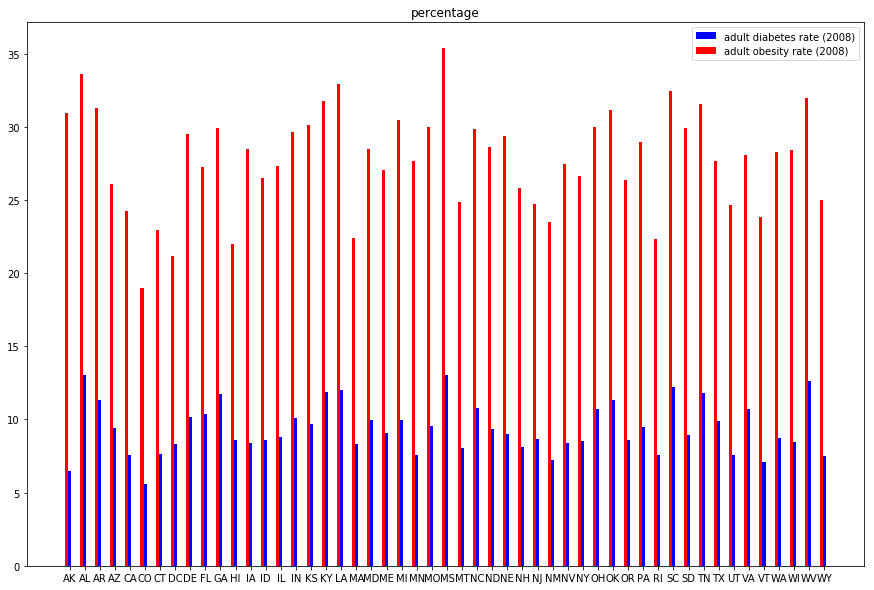

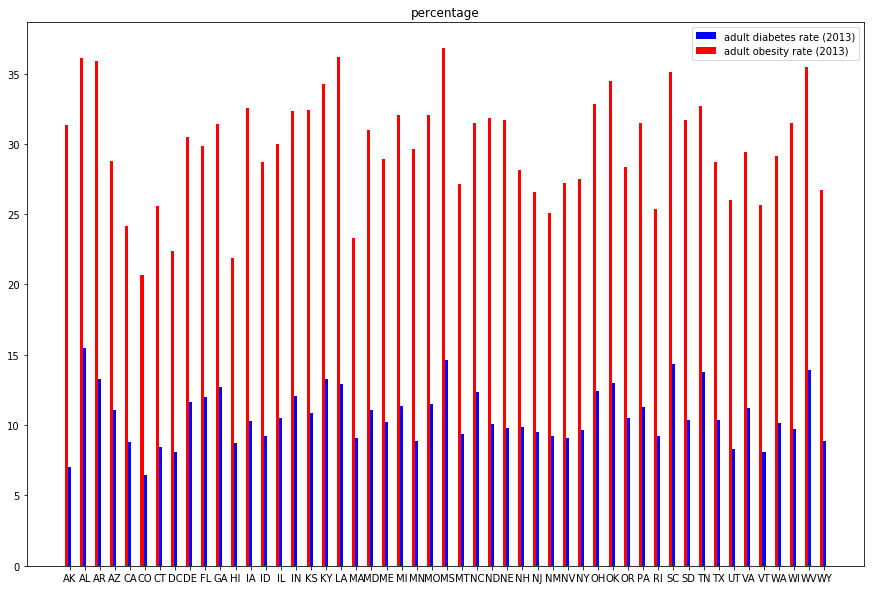

In [ ]:
obese_08= pd.DataFrame(health.groupby("State")["PCT_OBESE_ADULTS08"].mean().reset_index())
diabetes_08 = pd.DataFrame(health.groupby("State")["PCT_DIABETES_ADULTS08"].mean().reset_index())

obdia_08 = pd.merge(obese_08,diabetes_08, on="State")

X = np.arange(len(obdia_08.State))

fig = plt.figure()
fig.set_size_inches(15,10)
ax = plt.subplot(111)

ax.bar(X, obdia_08.PCT_DIABETES_ADULTS08, width=0.2, color='b', align='center')

ax.bar(X-0.2, obdia_08.PCT_OBESE_ADULTS08, width=0.2, color='r', align='center')
ax.legend(("adult diabetes rate (2008)","adult obesity rate (2008)"))
plt.xticks(X, obdia_08.State)
plt.title("percentage", fontsize=12)

plt.show()




obese= pd.DataFrame(health.groupby("State")["PCT_OBESE_ADULTS13"].mean().reset_index())
diabetes = pd.DataFrame(health.groupby("State")["PCT_DIABETES_ADULTS13"].mean().reset_index())

obdia = pd.merge(obese,diabetes, on="State")

X = np.arange(len(obdia.State))

fig = plt.figure()
fig.set_size_inches(15,10)
ax = plt.subplot(111)

ax.bar(X, obdia.PCT_DIABETES_ADULTS13, width=0.2, color='b', align='center')

ax.bar(X-0.2, obdia.PCT_OBESE_ADULTS13, width=0.2, color='r', align='center')
ax.legend(("adult diabetes rate (2013)","adult obesity rate (2013)"))
plt.xticks(X, obdia.State)
plt.title("percentage", fontsize=12)

plt.show()


obese_13_08= pd.DataFrame(health.groupby("State")["pct_obese_change"].mean().reset_index())
diabetes_13_08 = pd.DataFrame(health.groupby("State")["pct_diabetes_change"].mean().reset_index())

obdia_13_08 = pd.merge(obese_13_08,diabetes_13_08, on="State")

X = np.arange(len(obdia_13_08.State))

fig = plt.figure()
fig.set_size_inches(15,10)
ax = plt.subplot(111)

ax.bar(X, obdia_13_08.pct_diabetes_change, width=0.2, color='b', align='center')

ax.bar(X-0.2, obdia_13_08.pct_obese_change, width=0.2, color='r', align='center')
ax.legend(("adult diabetes rate (2013-08)","adult obesity rate (2013-08)"))
plt.xticks(X, obdia_13_08.State)
plt.title("percentage", fontsize=12)

plt.show()

In [ ]:
health.loc[:,"desc"] = "increase"
health.loc[health.State=="CA","desc"] = "CA_obesity"
health.loc[health.State=="DC","desc"] = "DC_diabetes"
health.loc[health.State=="HI","desc"] = "HI_obesity"
health.loc[health.State=="NV","desc"] = "NV_obesity"

In [ ]:
assheal = pd.merge(health,assistance[["FIPS","PCT_SBP09","PCT_REDUCED_LUNCH09",
                                      "PCT_FREE_LUNCH09","PCT_REDUCED_LUNCH14",
                                     "PCT_FREE_LUNCH14"]],on = "FIPS")

healtax = pd.merge(assheal[["FIPS","PCT_OBESE_ADULTS13",
                            "PCT_DIABETES_ADULTS13","RECFACPTH14"]], pricetax, on ="FIPS")

fig1 = plt.figure()
fig1.set_size_inches(15,10)
ax1 = sns.scatterplot(x="PCT_FREE_LUNCH09", y="PCT_DIABETES_ADULTS13",data=assheal)
plt.title("Adult obesity rate in 2013 as a function of Students eligible for free lunch (%) in 2009  ")
plt.show()


fig2 = plt.figure()
fig2.set_size_inches(15,10)
ax2 = sns.scatterplot(x="MILK_SODA_PRICE10", y="PCT_DIABETES_ADULTS13",data=healtax)
plt.title("Adult obesity rate in 2013 as a function of Price of low-fat milk/price of sodas in 2010")
plt.show()

In [ ]:
ast_heal = pd.merge(health[["FIPS","desc","PCT_OBESE_ADULTS13",
                            "PCT_DIABETES_ADULTS13","pct_obese_change",
                            "pct_diabetes_change"]],assistance,on = "FIPS")

pctx_hth = pd.merge(health[["FIPS","PCT_OBESE_ADULTS13","desc",
                            "PCT_DIABETES_ADULTS13","pct_obese_change","pct_diabetes_change"]],
                  pricetax, on="FIPS")


fig1 = plt.figure()
fig1.set_size_inches(15,10)
ax1 = sns.scatterplot(x="PCT_FREE_LUNCH09", y="PCT_DIABETES_ADULTS13", 
                      hue= "desc",size = "desc", sizes = [10,100,200,200,200],data=ast_heal)
plt.title("Adult obesity rate in 2013 as a function of Students eligible for free lunch (%) in 2009")
plt.show()

fig1 = plt.figure()
fig1.set_size_inches(15,10)
ax1 = sns.scatterplot(x="MILK_SODA_PRICE10", y="PCT_OBESE_ADULTS13",
                      hue="desc", size = "desc", sizes = [10,100,200,200,200], data=pctx_hth)
plt.title("Adult obesity rate in 2013 as a function of Price of low-fat milk/price of sodas in 2010")
plt.show()

In [ ]:
def rmse_cv(model, X, y):
    cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=100)
    rmse = np.sqrt(-cross_val_score(model,X,y, cv=cv, scoring="neg_mean_squared_error"))
    return(rmse)

In [ ]:
y_d = all_hth.PCT_DIABETES_ADULTS13
X_d = all_hth.drop(["FIPS","State","County","PCT_OBESE_ADULTS13",
                      "PCT_DIABETES_ADULTS13","pct_obese_change","pct_diabetes_change"],
                     axis=1)
xtrain_d,xtest_d,ytrain_d,ytest_d = train_test_split(X_d, y_d, test_size=0.3, random_state=100)

In [ ]:
flls = xtrain_d.columns


forest = RandomForestRegressor(n_estimators=5000,
                                random_state=100,
                                n_jobs=-1)

forest.fit(xtrain_d, ytrain_d)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(xtrain_d.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            flls[indices[f]], 
                            importances[indices[f]]))

plt.figure(figsize=(16,16))
plt.title('Feature Importances')
plt.bar(range(xtrain_d.shape[1]), 
        importances[indices],
        color='lightblue', 
        align='center')
plt.ylabel('Importance')
plt.xticks(range(xtrain_d.shape[1]), 
           flls[indices], rotation=90)
plt.xlim([-1, xtrain_d.shape[1]])
plt.show()



# 1. PCT_FREE_LUNCH09: Students eligible for free lunch (%), 2009
# 2. PC_FSRSALES12: Expenditures per capita, restaurants, 2012*
# 3. PCT_LACCESS_HHNV10:Households, no car & low access to store (%), 2010
# 4. SNAPSPTH12: SNAP-authorized stores/1,000 pop, 2012
# 5. MILK_SODA_PRICE10: Price of low-fat milk/price of sodas, 2010**
# 6. SODA_PRICE10: Price of low-fat milk/price of sodas, 2010**
# 7. PC_FFRSALES12: Expenditures per capita, fast food, 2012*
# 8. PC_FSRSALES07: Expenditures per capita, restaurants, 2007*
# 9. MILK_PRICE10: Price of low-fat milk/national average, 2010**
# 10. CONVSPTH14: Convenience stores/1,000 pop, 2014
# 11. RECFACPTH14: Recreation & fitness facilities/1,000 pop, 2014
# 12. SODATAX_VENDM14: Soda sales tax, vending, 2014*
# 13. FFRPTH09: Fast-food restaurants/1,000 pop, 2009
# 14. PCT_LACCESS_CHILD10: Children, low access to store (%), 2010
# 15. FFRPTH14: Fast-food restaurants/1,000 pop, 2014
# 16. PCT_LOCLFARM12: Farms with direct sales (%), 2012
# 17. PCH_SUPERCPTH_09_14: Supercenters & club stores/1,000 pop (% change), 2007-14
# 18. PC_FFRSALES07: Expenditures per capita, fast food, 2007*
# 19. CONVSPTH09: Convenience stores/1,000 pop, 2009
# 20. PCT_LACCESS_SENIORS10: Seniors, low access to store (%), 2010



In [ ]:
from xgboost import XGBRegressor

xgb = XGBRegressor(random_state=100)

score = rmse_cv(xgb,xtrain_d,ytrain_d)
print(score.mean(), score.std())